# Considering Whole Data

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data=pd.read_csv("https://www.dropbox.com/scl/fi/bheugnexfbdrh022vbs0e/Crab-Molt-Data.csv?rlkey=e96xcd6h8pdhxc4yyog5imsy5&e=1&st=t694xyty&dl=1")
print(data)

print(data.isnull().sum())

# Drop NaN values in 'Post-molt' and 'Pre-molt' to avoid issues
data.dropna(subset=['Post-molt', 'Pre-molt'], inplace=True)

# Extract the columns
post_molt = data['Post-molt']
pre_molt = data['Pre-molt']

# Filter the dataset for Field crabs
field_crabs = data[data['Location'] == 'Field']

# Filter the dataset for Lab crabs
lab_crabs = data[data['Location'] == 'Lab']

     Post-molt  Pre-molt Location
0        127.7     113.6    Field
1        133.2     118.1    Field
2        135.3     119.9    Field
3        143.3     126.2    Field
4        139.3     126.7    Field
..         ...       ...      ...
467      150.3     135.9      Lab
468      151.2     135.6      Lab
469      143.5     129.6      Lab
470      148.3     134.1      Lab
471      129.2     114.4      Lab

[472 rows x 3 columns]
Post-molt    0
Pre-molt     0
Location     0
dtype: int64


In [ ]:
print(post_molt)

0      127.7
1      133.2
2      135.3
3      143.3
4      139.3
       ...  
467    150.3
468    151.2
469    143.5
470    148.3
471    129.2
Name: Post-molt, Length: 472, dtype: float64


In [ ]:
print(pre_molt)

0      113.6
1      118.1
2      119.9
3      126.2
4      126.7
       ...  
467    135.9
468    135.6
469    129.6
470    134.1
471    114.4
Name: Pre-molt, Length: 472, dtype: float64


DESCRIPTIVE STATISTICS


--- Descriptive Statistics for Crabs Data ---



--- Descriptive Statistics for Pre-molt ---
Maximum: 155.1
Minimum: 31.1
Median: 132.8
Mean: 129.21186440677965
Standard Deviation: 15.86452020035652
Skewness: -2.0034871763549766
Kurtosis: 6.766321650922
QQ Plot:


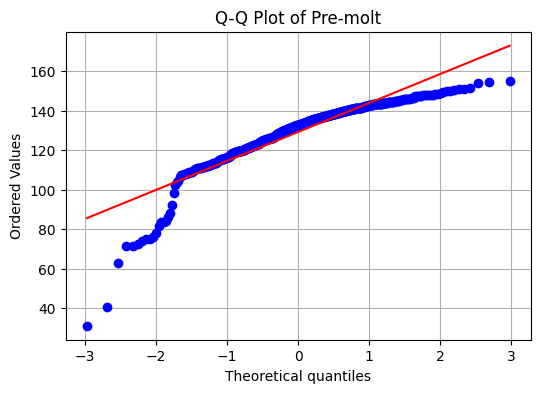


--- Normality Tests for Pre-molt ---
Shapiro-Wilk Test: Statistic = 0.8502103867445177, p-value = 9.000187748233194e-21
Anderson-Darling Test: Statistic = 12.947777132426495, Critical Values = [0.571 0.651 0.78  0.91  1.083]
Kolmogorov-Smirnov Test: Statistic = 0.10047332186543623, p-value = 0.0001336095286419177
Cramér-von Mises Test: Statistic = 157.33333333333331, p-value = 4.2552647294691326e-08

--- Descriptive Statistics for Post-molt ---
Maximum: 166.8
Minimum: 38.8
Median: 147.4
Mean: 143.89766949152542
Standard Deviation: 14.640602257840124
Skewness: -2.3469021583966594
Kurtosis: 10.116042372071325
QQ Plot:


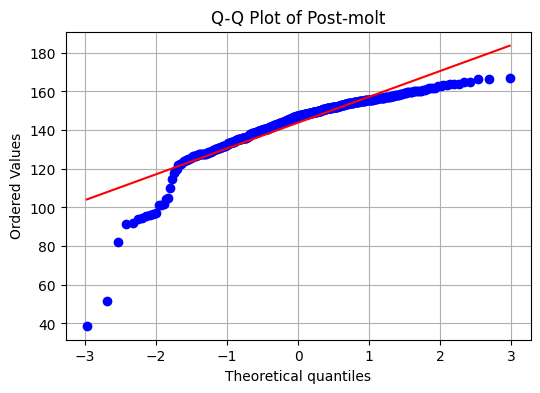


--- Normality Tests for Post-molt ---
Shapiro-Wilk Test: Statistic = 0.8298033094981744, p-value = 4.861382514717977e-22
Anderson-Darling Test: Statistic = 13.970186941171676, Critical Values = [0.571 0.651 0.78  0.91  1.083]
Kolmogorov-Smirnov Test: Statistic = 0.10295773382621526, p-value = 8.26124521137443e-05
Cramér-von Mises Test: Statistic = 157.33333333333331, p-value = 4.2552647294691326e-08


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro, anderson, kstest, cramervonmises

def normality_tests(data, column_name):
    print(f"\n--- Normality Tests for {column_name} ---")

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(data[column_name])
    print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, p-value = {shapiro_p}")

    # Anderson-Darling Test
    anderson_result = anderson(data[column_name], dist='norm')
    print(f"Anderson-Darling Test: Statistic = {anderson_result.statistic}, Critical Values = {anderson_result.critical_values}")

    # Kolmogorov-Smirnov Test (one-sample)
    ks_stat, ks_p = kstest(data[column_name], 'norm', args=(np.mean(data[column_name]), np.std(data[column_name])))
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat}, p-value = {ks_p}")

    # Cramér-von Mises Test
    cvm_result = cramervonmises(data[column_name], 'norm')
    print(f"Cramér-von Mises Test: Statistic = {cvm_result.statistic}, p-value = {cvm_result.pvalue}")

def descriptive_stats(data, column_name):

    # Descriptive statistics
    maximum = np.max(data[column_name])
    minimum = np.min(data[column_name])
    median = np.median(data[column_name])
    mean = np.mean(data[column_name])
    std_dev = np.std(data[column_name], ddof=1)  # Sample standard deviation
    skewness = stats.skew(data[column_name])
    kurtosis = stats.kurtosis(data[column_name])

    print(f"\n--- Descriptive Statistics for {column_name} ---")
    print(f"Maximum: {maximum}")
    print(f"Minimum: {minimum}")
    print(f"Median: {median}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

    # Q-Q Plot for normality
    print(f"QQ Plot:")
    plt.figure(figsize=(6, 4))
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column_name}")
    plt.grid(True)
    plt.show()

    # Perform normality tests for crabs (Pre-molt and Post-molt)
    normality_tests(data, column_name)

# Perform Descriptive Statistics for Crabs (Pre-molt and Post-molt)
print("\n--- Descriptive Statistics for Crabs Data ---\n\n")
descriptive_stats(data, 'Pre-molt')
descriptive_stats(data, 'Post-molt')

SMOOTH HISTOGRAM

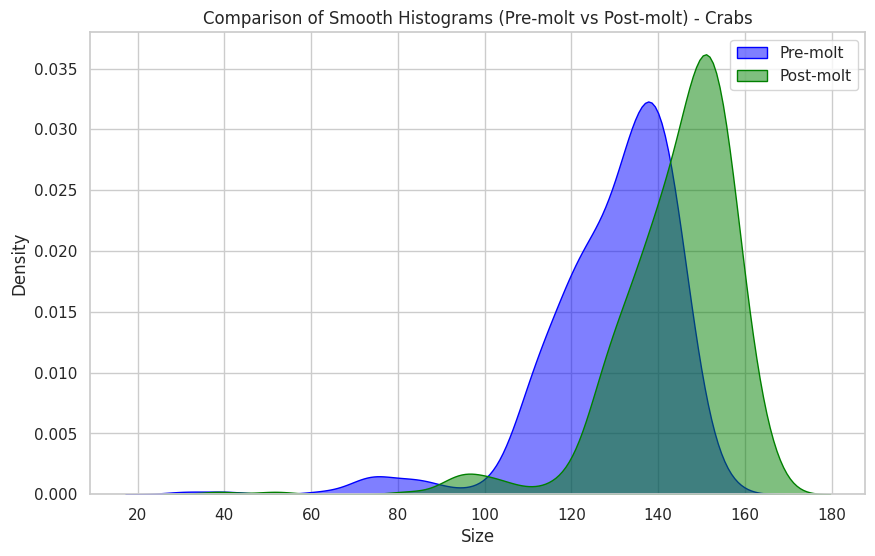

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, label):

    # Set the style for the plots
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # KDE plot for Pre-molt
    sns.kdeplot(data['Pre-molt'], color='blue', label='Pre-molt', fill=True, alpha=0.5)

    # KDE plot for Post-molt
    sns.kdeplot(data['Post-molt'], color='green', label='Post-molt', fill=True, alpha=0.5)

    plt.title(f"Comparison of Smooth Histograms (Pre-molt vs Post-molt) - {label}")
    plt.xlabel('Size')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Histogram for Crabs
plot_histogram(data, 'Crabs')

SCATTER PLOT

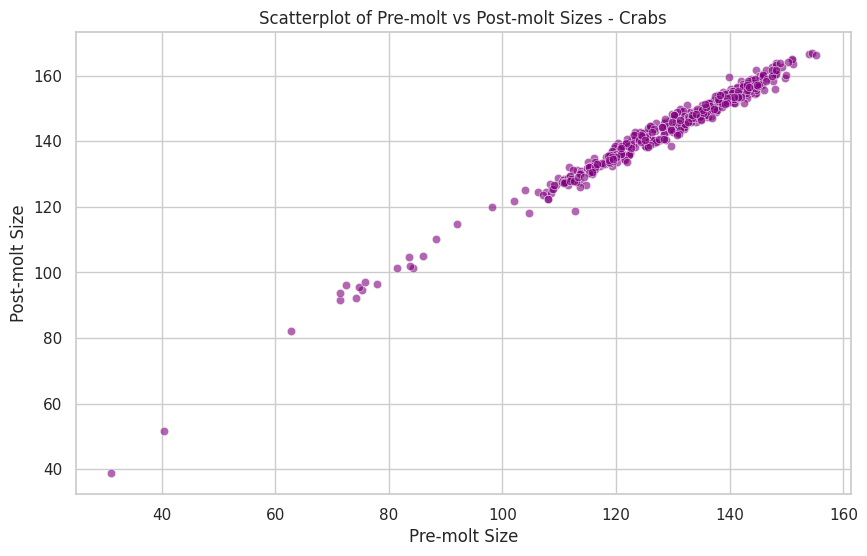

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(data, label):

    # Set the style for the plots
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Scatterplot
    sns.scatterplot(x=data['Pre-molt'], y=data['Post-molt'], color='purple', alpha=0.6)

    plt.title(f"Scatterplot of Pre-molt vs Post-molt Sizes - {label}")
    plt.xlabel('Pre-molt Size')
    plt.ylabel('Post-molt Size')
    plt.grid(True)

    # Show the plot
    plt.show()

# Scatter Plot for Crabs
plot_scatter(data, 'Crabs')

LINEAR LEAST SQUARES MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

def ols(data, label):
    # Check if data is empty
    if data.empty:
        print("Data is empty. Please check the values.")

    # Proceed with modeling only if there is data present
    if not data.empty:

        # Model for crabs
        data_model = sm.OLS(data['Pre-molt'], sm.add_constant(data['Post-molt'])).fit()

        # Print summary of the model
        print(f"\n--- {label} Model Summary --- \n\n")
        print(data_model.summary())

    else:
        print("Could not fit model due to empty data.")

# OLS Regression Model Results for Crabs
ols(data, 'Crabs')


--- Crabs Model Summary --- 


                            OLS Regression Results                            
Dep. Variable:               Pre-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.405e+04
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:34:24   Log-Likelihood:                -1040.6
No. Observations:                 472   AIC:                             2085.
Df Residuals:                     470   BIC:                             2094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.213


--- Analysis for Crabs ---


Pearson's R-squared value: 0.9808325947886156
Residuals Plot:


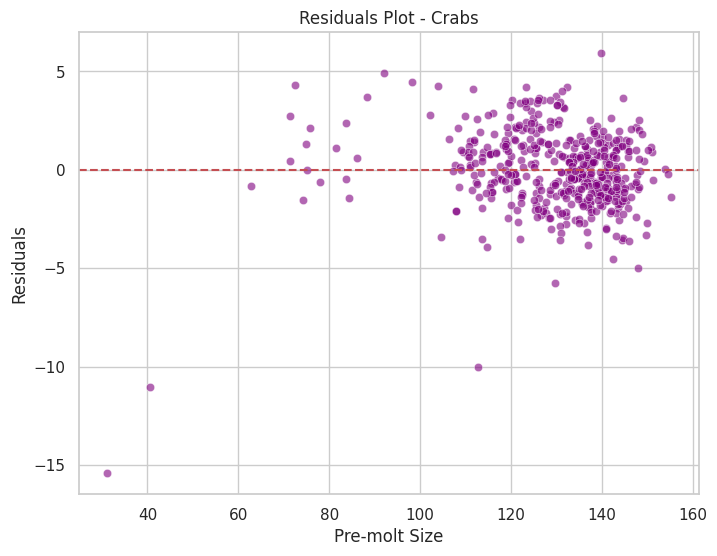

Normality:
  Skewness of residuals: -1.3567678278555013
  Kurtosis of residuals: 9.08552934835206
QQ Plot:


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


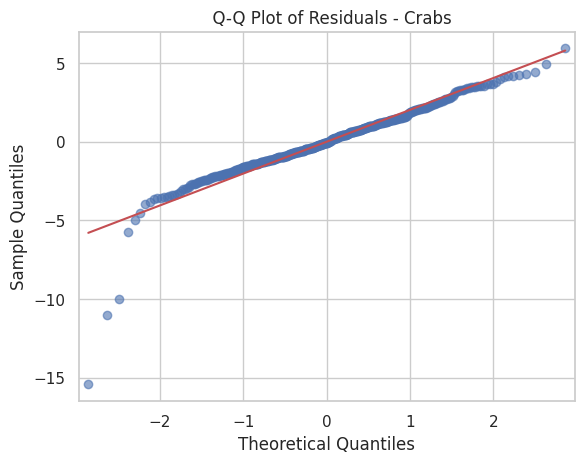

  Kolmogorov-Smirnov Test: Stat=0.1468050099561844, p-value=2.4210672863477986e-09
  Anderson-Darling Test: Stat=2.5820577584036073
  Shapiro-Wilk Test: Stat=0.9184720718599964, p-value=2.7447278854598467e-15

Heteroskedasticity:
 Residuals Plot:


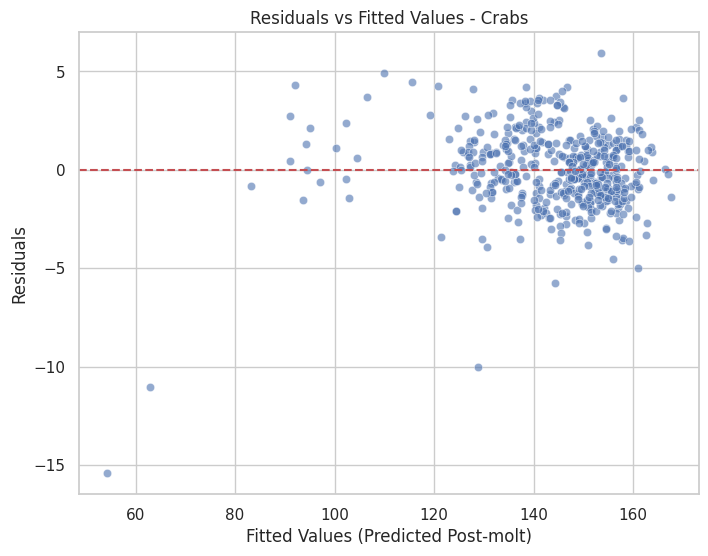

  Breusch-Pagan Test:
{'Lagrange multiplier statistic': 67.43361312510277, 'p-value': 2.1790209974457719e-16, 'f-value': 78.3401666500753, 'f p-value': 1.774474825383474e-17}
  White Test:
{'Lagrange multiplier statistic': 210.4660521745804, 'p-value': 1.9855345854214166e-46, 'f-value': 188.71083331745643, 'f p-value': 7.429055680051075e-61}


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Function to perform analysis for a given dataset
def analyze_crab_data(data, label):
    print(f"\n--- Analysis for {label} ---\n\n")

    # Step 1: Fit a linear regression model (Post-molt ~ Pre-molt)
    X = sm.add_constant(data['Pre-molt'])
    model = sm.OLS(data['Post-molt'], X).fit()

    # Pearson's R-squared
    r_squared = model.rsquared
    print(f"Pearson's R-squared value: {r_squared}")

    # Residuals
    residuals = model.resid

    # Step 2: Plot of the residuals
    print("Residuals Plot:")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['Pre-molt'], y=residuals, color='purple', alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"Residuals Plot - {label}")
    plt.xlabel('Pre-molt Size')
    plt.ylabel('Residuals')
    plt.show()

    # Step 3: Normality Checks of Residuals
    # Skewness and Kurtosis
    print("Normality:")
    skewness = stats.skew(residuals)
    kurtosis = stats.kurtosis(residuals)
    print(f"  Skewness of residuals: {skewness}")
    print(f"  Kurtosis of residuals: {kurtosis}")

    # Step 4: Quantile Plot of Residuals (Q-Q Plot)
    print("QQ Plot:")
    qqplot(residuals, line='s', color='purple', alpha=0.6)
    plt.title(f"  Q-Q Plot of Residuals - {label}")
    plt.show()

    # Step 5: Various Normality Tests
    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(residuals, 'norm')
    print(f"  Kolmogorov-Smirnov Test: Stat={ks_stat}, p-value={ks_p_value}")

    # Anderson-Darling Test
    ad_stat = normal_ad(residuals)[0]
    print(f"  Anderson-Darling Test: Stat={ad_stat}")

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(residuals)
    print(f"  Shapiro-Wilk Test: Stat={sw_stat}, p-value={sw_p_value}")

    # Step 6: Various Heteroskedasticity Tests
    # Function to perform heteroskedasticity tests for a given dataset
    def heteroskedasticity_analysis(data, label):
        print(f"\nHeteroskedasticity:")

        # Fit a linear regression model (Post-molt ~ Pre-molt)
        X = sm.add_constant(data['Pre-molt'])
        model = sm.OLS(data['Post-molt'], X).fit()

        # Residuals
        residuals = model.resid
        fitted_vals = model.fittedvalues

        # Visual estimation from the plot of residuals (Residuals vs Fitted)
        print(" Residuals Plot:")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f"Residuals vs Fitted Values - {label}")
        plt.xlabel('Fitted Values (Predicted Post-molt)')
        plt.ylabel('Residuals')
        plt.show()

        # Breusch–Pagan Test for heteroskedasticity
        # The test checks if residual variance is related to the fitted values
        bp_test = het_breuschpagan(residuals, X)
        labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
        print(f"  Breusch-Pagan Test:\n{dict(zip(labels, bp_test))}")

        # Step 4: White Test for heteroskedasticity
        # A more general test not assuming any specific form of heteroskedasticity
        white_test = het_white(residuals, X)
        print(f"  White Test:\n{dict(zip(labels, white_test))}")

    # Heteroskedasticity for Crabs
    heteroskedasticity_analysis(data, label)

# Analysis Result for Crabs
analyze_crab_data(data, 'Crabs')

RUNNING SIMPLE LINEAR REGRESSION MODEL


--- Analysis of Linear Model for Crabs ---


Mean Absolute Error (MAE): 1.647784317279592
Mean Squared Error (MSE): 4.813889496399352
Root Mean Squared Error (RMSE): 2.194057769613041
R-squared value: 0.9808325947886156


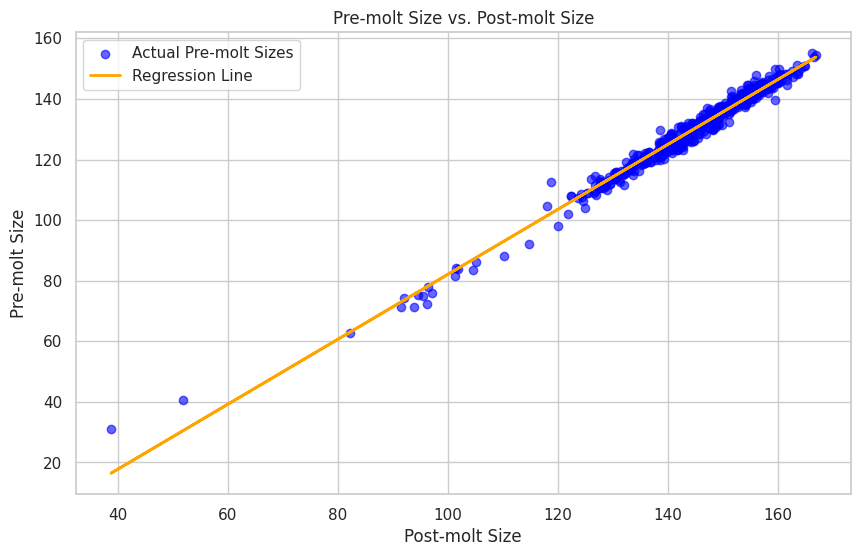

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Function to build and evaluate linear models
def linear_model(data, label):
    print(f"\n--- Analysis of Linear Model for {label} ---\n\n")

    # Step 1: Define the feature (post-molt size) and target (pre-molt size)
    X = data[['Post-molt']]  # Feature (independent variable)
    y = data['Pre-molt']     # Target (dependent variable)

    # Step 2: Create a Linear Regression model
    model = LinearRegression()

    # Step 3: Fit the model on the entire dataset
    model.fit(X, y)

    # Step 4: Make predictions
    y_pred = model.predict(X)

    # Step 5: Evaluate the model performance
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared value: {r_squared}")

    # Step 6: Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Pre-molt Sizes', alpha=0.6)
    plt.plot(X, y_pred, color='orange', linewidth=2, label='Regression Line')
    plt.title('Pre-molt Size vs. Post-molt Size')
    plt.xlabel('Post-molt Size')
    plt.ylabel('Pre-molt Size')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

# Linear Model for Crabs
crab_model = linear_model(data, 'Crabs')

UTILIZING K-FOLD CROSS-VALIDATION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Function to perform cross-validation and evaluate linear models
def cross_validation_analysis(data, label):
    print(f"\n--- Cross-Validation Analysis for {label} ---\n\n")

    # Step 1: Split data into predictors (X) and target (y)
    X = data['Pre-molt'].values.reshape(-1, 1)  # Predictor: Pre-molt size
    y = data['Post-molt'].values  # Target: Post-molt size

    # Step 2: Initialize linear regression model
    model = LinearRegression()

    # Step 3: Perform k-Fold Cross-Validation (with k=10)
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Step 4: Evaluate the model using cross-validation
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')  # MAE
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')  # MSE
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')  # R-squared

    # Convert negative MSE scores to positive and compute RMSE
    mse_scores = -mse_scores
    rmse_scores = np.sqrt(mse_scores)

    print(f"Mean Absolute Error (MAE): {np.mean(mae_scores):.3f}")
    print(f"Mean Squared Error (MSE): {np.mean(mse_scores):.3f}")
    print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores):.3f}")
    print(f"R-squared (R2): {np.mean(r2_scores):.3f}")

    # Step 5: Fit a model on the entire dataset and print coefficients
    model.fit(X, y)
    print(f"Model Coefficients: Intercept = {model.intercept_:.3f}, Slope = {model.coef_[0]:.3f}")

    return model

# Cross-Validation For Crabs
crab_cv_model = cross_validation_analysis(data, 'Crabs')


--- Cross-Validation Analysis for Crabs ---


Mean Absolute Error (MAE): -1.492
Mean Squared Error (MSE): 4.231
Root Mean Squared Error (RMSE): 1.999
R-squared (R2): 0.980
Model Coefficients: Intercept = 25.803, Slope = 0.914


# Considering Field Data

In [ ]:
# Extract the columns
post_molt_field_crabs = field_crabs['Post-molt']
pre_molt_field_crabs = field_crabs['Pre-molt']

In [ ]:
print(field_crabs)

     Post-molt  Pre-molt Location
0        127.7     113.6    Field
1        133.2     118.1    Field
2        135.3     119.9    Field
3        143.3     126.2    Field
4        139.3     126.7    Field
..         ...       ...      ...
106      154.6     143.7    Field
107      157.8     144.2    Field
108      161.7     146.4    Field
109      160.6     147.8    Field
110      156.0     147.9    Field

[111 rows x 3 columns]


In [ ]:
print(post_molt_field_crabs)

0      127.7
1      133.2
2      135.3
3      143.3
4      139.3
       ...  
106    154.6
107    157.8
108    161.7
109    160.6
110    156.0
Name: Post-molt, Length: 111, dtype: float64


In [ ]:
print(pre_molt_field_crabs)

0      113.6
1      118.1
2      119.9
3      126.2
4      126.7
       ...  
106    143.7
107    144.2
108    146.4
109    147.8
110    147.9
Name: Pre-molt, Length: 111, dtype: float64


DESCRIPTIVE STATISTICS


--- Descriptive Statistics for Field Crabs Data ---



--- Descriptive Statistics for Pre-molt ---
Maximum: 153.9
Minimum: 113.6
Median: 140.1
Mean: 139.00900900900902
Standard Deviation: 7.251151000164789
Skewness: -1.1108752329732858
Kurtosis: 1.7614432515555913
QQ Plot:


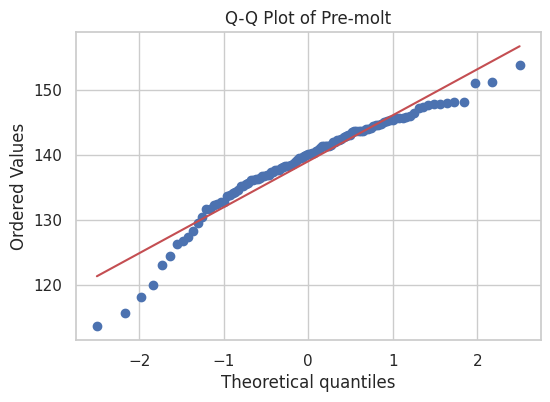


--- Normality Tests for Pre-molt ---
Shapiro-Wilk Test: Statistic = 0.9313224935164637, p-value = 2.387389571369571e-05
Anderson-Darling Test: Statistic = 1.899067442726178, Critical Values = [0.557 0.634 0.761 0.888 1.056]
Kolmogorov-Smirnov Test: Statistic = 0.10023147730445614, p-value = 0.20077331033931056
Cramér-von Mises Test: Statistic = 37.00000000000001, p-value = 0

--- Descriptive Statistics for Post-molt ---
Maximum: 166.5
Minimum: 127.7
Median: 154.0
Mean: 152.96396396396398
Standard Deviation: 6.7199674348885265
Skewness: -1.1190639272668943
Kurtosis: 2.2407060218489283
QQ Plot:


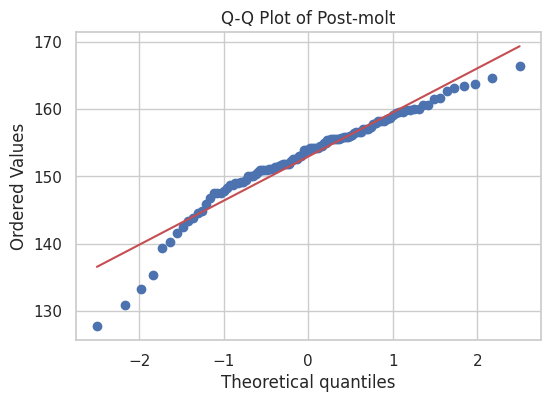


--- Normality Tests for Post-molt ---
Shapiro-Wilk Test: Statistic = 0.9334666723036673, p-value = 3.22624163565112e-05
Anderson-Darling Test: Statistic = 1.667443334267034, Critical Values = [0.557 0.634 0.761 0.888 1.056]
Kolmogorov-Smirnov Test: Statistic = 0.09955953196839079, p-value = 0.206936346084493
Cramér-von Mises Test: Statistic = 37.00000000000001, p-value = 0


In [ ]:
# Perform Descriptive Statistics for Field Crabs (Pre-molt and Post-molt)
print("\n--- Descriptive Statistics for Field Crabs Data ---\n\n")
descriptive_stats(field_crabs, 'Pre-molt')
descriptive_stats(field_crabs, 'Post-molt')

SMOOTH HISTOGRAM

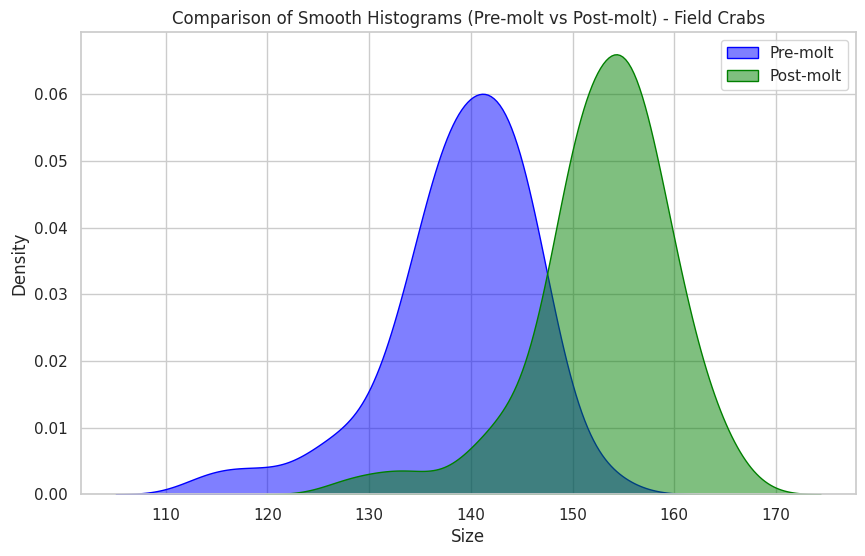

In [ ]:
# Histogram for Field Crabs
plot_histogram(field_crabs, 'Field Crabs')

SCATTER PLOT

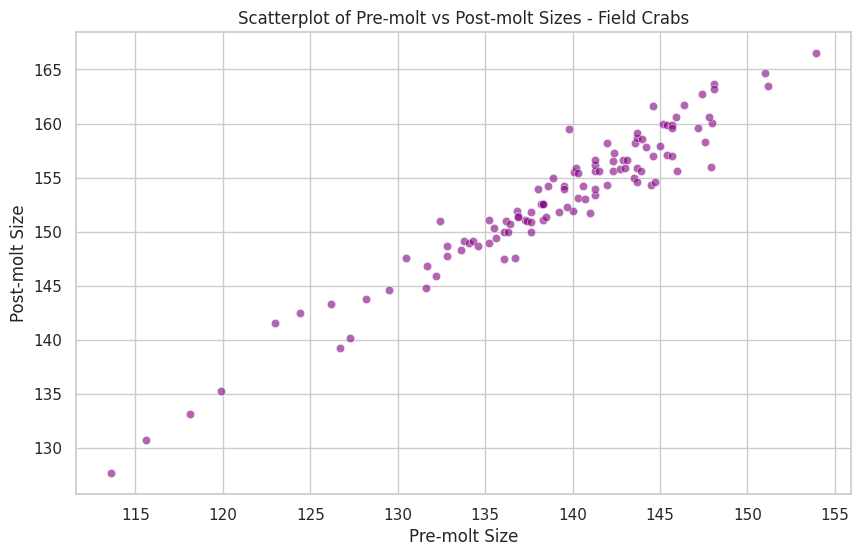

In [ ]:
# Scatter Plot for Field Crabs
plot_scatter(field_crabs, 'Field Crabs')

LINEAR LEAST SQUARES MODEL

In [ ]:
# OLS Regression Model Results for Field Crabs
ols(field_crabs, 'Field Crabs')


--- Field Crabs Model Summary --- 


                            OLS Regression Results                            
Dep. Variable:               Pre-molt   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1512.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           9.94e-66
Time:                        08:34:34   Log-Likelihood:                -227.08
No. Observations:                 111   AIC:                             458.2
Df Residuals:                     109   BIC:                             463.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -


--- Analysis for Field Crabs ---


Pearson's R-squared value: 0.9327747000533485
Residuals Plot:


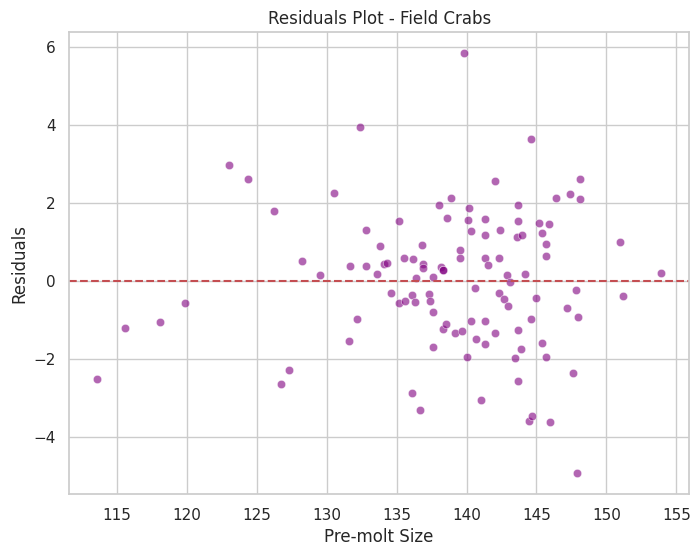

Normality:
  Skewness of residuals: 0.035290226200064355
  Kurtosis of residuals: 0.6268179868798471
QQ Plot:


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


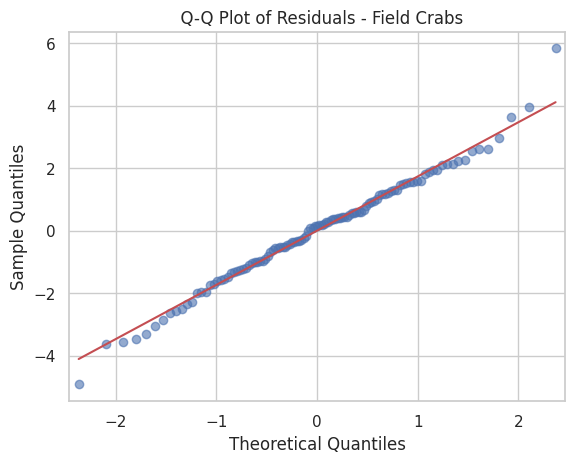

  Kolmogorov-Smirnov Test: Stat=0.14036884686862783, p-value=0.022695786883318934
  Anderson-Darling Test: Stat=0.24025152512876957
  Shapiro-Wilk Test: Stat=0.9917771230472963, p-value=0.7482347049933264

Heteroskedasticity:
 Residuals Plot:


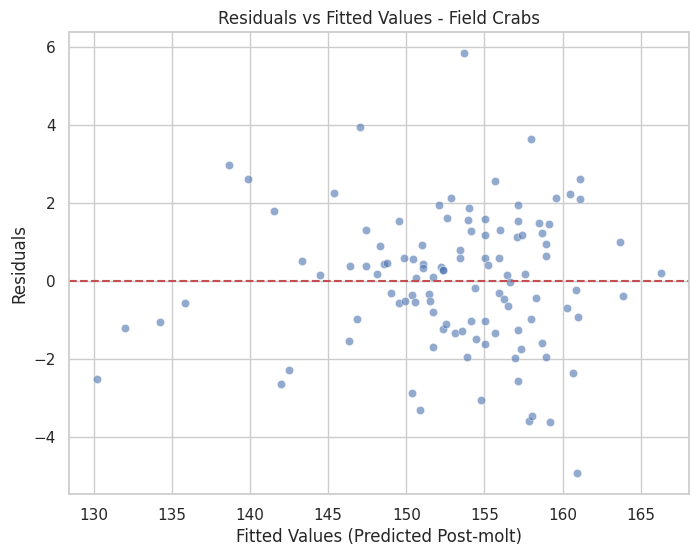

  Breusch-Pagan Test:
{'Lagrange multiplier statistic': 0.2096347735817996, 'p-value': 0.6470538154013719, 'f-value': 0.20624708902906982, 'f p-value': 0.6506279616345616}
  White Test:
{'Lagrange multiplier statistic': 1.2652131111788358, 'p-value': 0.5312053785496686, 'f-value': 0.6226057382594452, 'f p-value': 0.5384590387890047}


In [ ]:
# Analysis Result for Field Crabs
analyze_crab_data(field_crabs, 'Field Crabs')

RUNNING SIMPLE LINEAR REGRESSION MODEL


--- Analysis of Linear Model for Field Crabs ---


Mean Absolute Error (MAE): 1.4452891401178964
Mean Squared Error (MSE): 3.5028081637307587
Root Mean Squared Error (RMSE): 1.8715790562332009
R-squared value: 0.9327747000533485


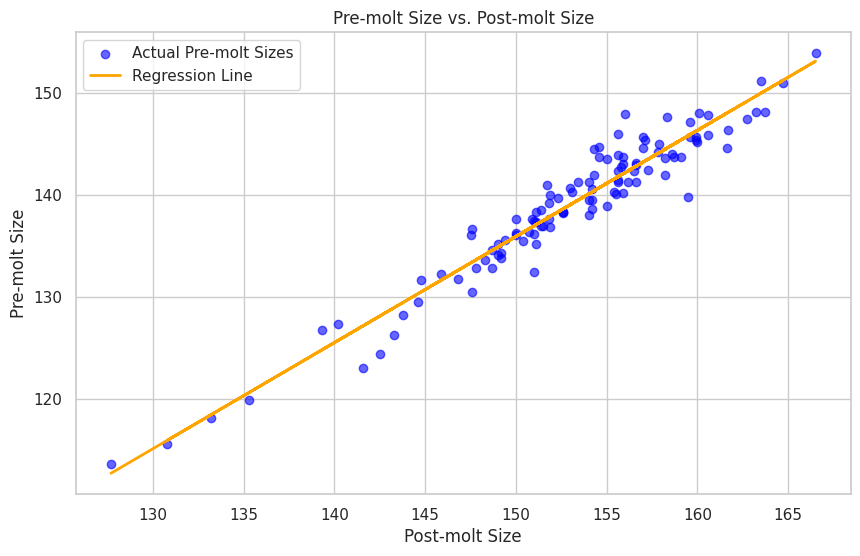

In [ ]:
# Linear Model for Field Crabs
field_model = linear_model(field_crabs, 'Field Crabs')

UTILIZING K-FOLD CROSS-VALIDATION

In [ ]:
# Cross-Validation For Field Crabs
field_cv_model = cross_validation_analysis(field_crabs, 'Field Crabs')


--- Cross-Validation Analysis for Field Crabs ---


Mean Absolute Error (MAE): -1.382
Mean Squared Error (MSE): 3.113
Root Mean Squared Error (RMSE): 1.715
R-squared (R2): 0.891
Model Coefficients: Intercept = 28.544, Slope = 0.895


# Considering Lab Data

In [ ]:
# Extract the columns
post_molt_lab_crabs = lab_crabs['Post-molt']
pre_molt_lab_crabs = lab_crabs['Pre-molt']

In [ ]:
print(lab_crabs)

     Post-molt  Pre-molt Location
111      154.8     142.3      Lab
112      142.5     125.1      Lab
113      154.9     140.8      Lab
114      136.5     122.4      Lab
115      146.6     133.2      Lab
..         ...       ...      ...
467      150.3     135.9      Lab
468      151.2     135.6      Lab
469      143.5     129.6      Lab
470      148.3     134.1      Lab
471      129.2     114.4      Lab

[361 rows x 3 columns]


In [ ]:
print(post_molt_lab_crabs)

111    154.8
112    142.5
113    154.9
114    136.5
115    146.6
       ...  
467    150.3
468    151.2
469    143.5
470    148.3
471    129.2
Name: Post-molt, Length: 361, dtype: float64


In [ ]:
print(pre_molt_lab_crabs)

111    142.3
112    125.1
113    140.8
114    122.4
115    133.2
       ...  
467    135.9
468    135.6
469    129.6
470    134.1
471    114.4
Name: Pre-molt, Length: 361, dtype: float64


DESCRIPTIVE STATISTICS


--- Descriptive Statistics for Lab Crabs Data ---



--- Descriptive Statistics for Pre-molt ---
Maximum: 155.1
Minimum: 31.1
Median: 128.9
Mean: 126.19944598337948
Standard Deviation: 16.568779198741762
Skewness: -1.8889368862480744
Kurtosis: 6.024397123246954
QQ Plot:


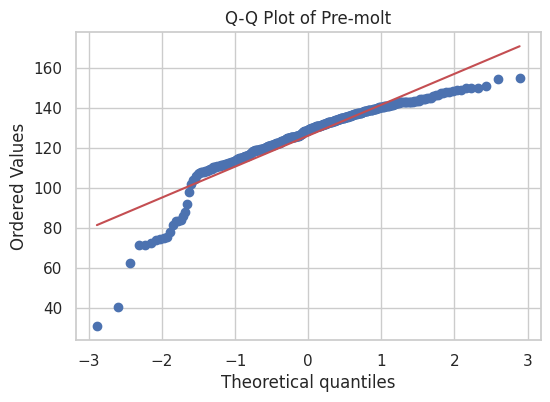


--- Normality Tests for Pre-molt ---
Shapiro-Wilk Test: Statistic = 0.8615104215794123, p-value = 2.1427046241940032e-17
Anderson-Darling Test: Statistic = 9.255798135902864, Critical Values = [0.57  0.649 0.779 0.908 1.08 ]
Kolmogorov-Smirnov Test: Statistic = 0.10140374051144835, p-value = 0.0011013286243370423
Cramér-von Mises Test: Statistic = 120.33333333333333, p-value = 0

--- Descriptive Statistics for Post-molt ---
Maximum: 166.8
Minimum: 38.8
Median: 143.7
Mean: 141.10997229916896
Standard Deviation: 15.280779875724328
Skewness: -2.2881145615037486
Kurtosis: 9.442201794919175
QQ Plot:


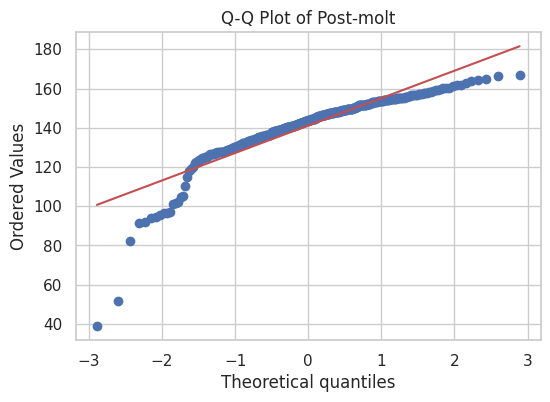


--- Normality Tests for Post-molt ---
Shapiro-Wilk Test: Statistic = 0.8333079256419077, p-value = 4.628040046363554e-19
Anderson-Darling Test: Statistic = 10.758090987208561, Critical Values = [0.57  0.649 0.779 0.908 1.08 ]
Kolmogorov-Smirnov Test: Statistic = 0.1041079521566512, p-value = 0.000734766999131347
Cramér-von Mises Test: Statistic = 120.33333333333333, p-value = 0


In [ ]:
# Perform Descriptive Statistics for Lab Crabs (Pre-molt and Post-molt)
print("\n--- Descriptive Statistics for Lab Crabs Data ---\n\n")
descriptive_stats(lab_crabs, 'Pre-molt')
descriptive_stats(lab_crabs, 'Post-molt')

SMOOTH HISTOGRAM

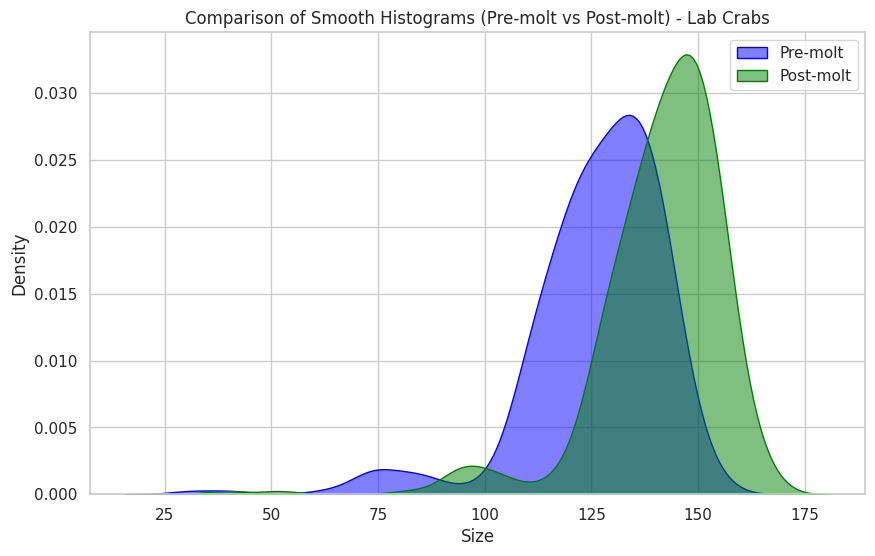

In [ ]:
# Histogram for Lab Crabs
plot_histogram(lab_crabs, 'Lab Crabs')

SCATTER PLOT

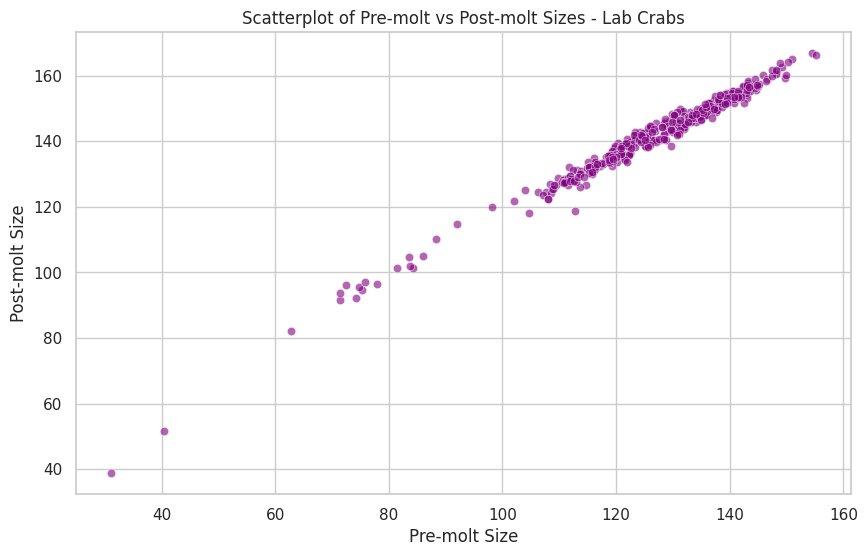

In [ ]:
# Scatter Plot for Lab Crabs
plot_scatter(lab_crabs, 'Lab Crabs')

LINEAR LEAST SQUARES MODEL

In [ ]:
# OLS Regression Model Results for Lab Crabs
ols(lab_crabs, 'Lab Crabs')


--- Lab Crabs Model Summary --- 


                            OLS Regression Results                            
Dep. Variable:               Pre-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.853e+04
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          4.67e-311
Time:                        08:34:41   Log-Likelihood:                -809.88
No. Observations:                 361   AIC:                             1624.
Df Residuals:                     359   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25


--- Analysis for Lab Crabs ---


Pearson's R-squared value: 0.9809989339639513
Residuals Plot:


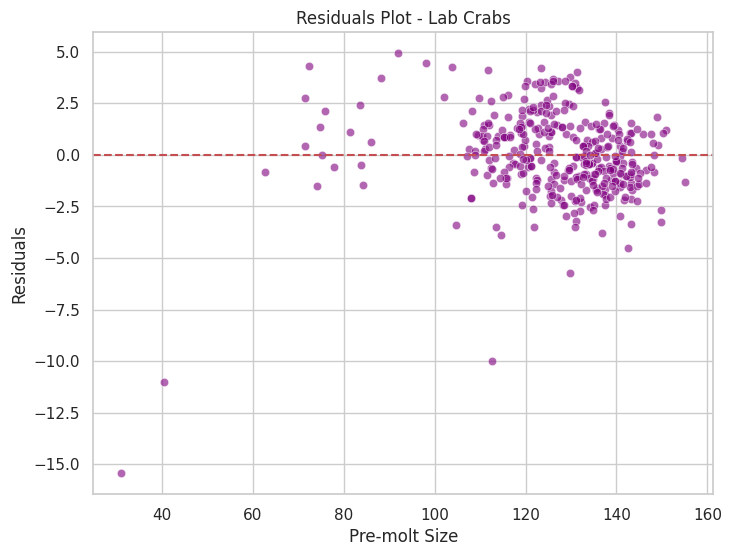

Normality:
  Skewness of residuals: -1.5863949560555701
  Kurtosis of residuals: 10.04952467407496
QQ Plot:


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


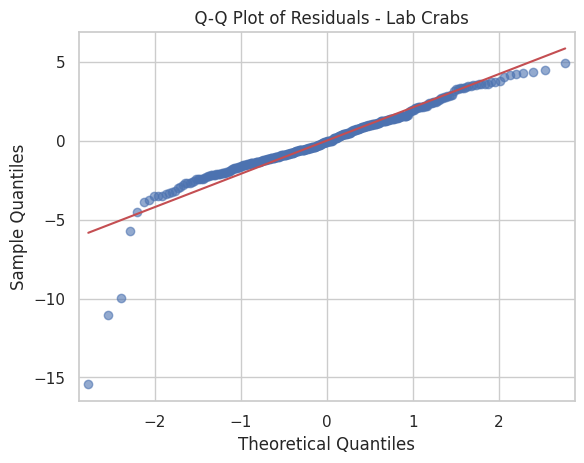

  Kolmogorov-Smirnov Test: Stat=0.1543914670111599, p-value=5.575828070134604e-08
  Anderson-Darling Test: Stat=2.8523708972296618
  Shapiro-Wilk Test: Stat=0.8977775672907583, p-value=7.604759167735644e-15

Heteroskedasticity:
 Residuals Plot:


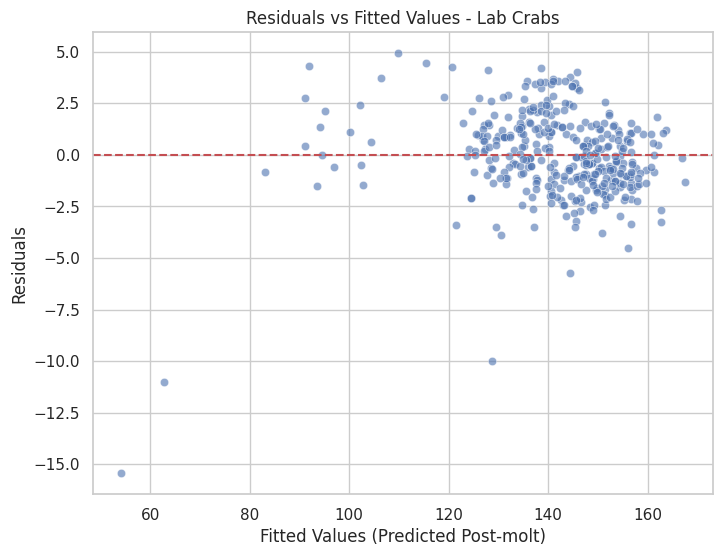

  Breusch-Pagan Test:
{'Lagrange multiplier statistic': 60.250628973994914, 'p-value': 8.351614131360776e-15, 'f-value': 71.92026945184824, 'f p-value': 5.919125133950059e-16}
  White Test:
{'Lagrange multiplier statistic': 168.61301865187127, 'p-value': 2.4330341864269923e-37, 'f-value': 156.8803155348148, 'f p-value': 1.1848343803008148e-49}


In [ ]:
# Analysis Result for Lab Crabs
analyze_crab_data(lab_crabs, 'Lab Crabs')

RUNNING SIMPLE LINEAR REGRESSION MODEL


--- Analysis of Linear Model for Lab Crabs ---


Mean Absolute Error (MAE): 1.7049966978996771
Mean Squared Error (MSE): 5.20180762592261
Root Mean Squared Error (RMSE): 2.2807471639624173
R-squared value: 0.9809989339639513


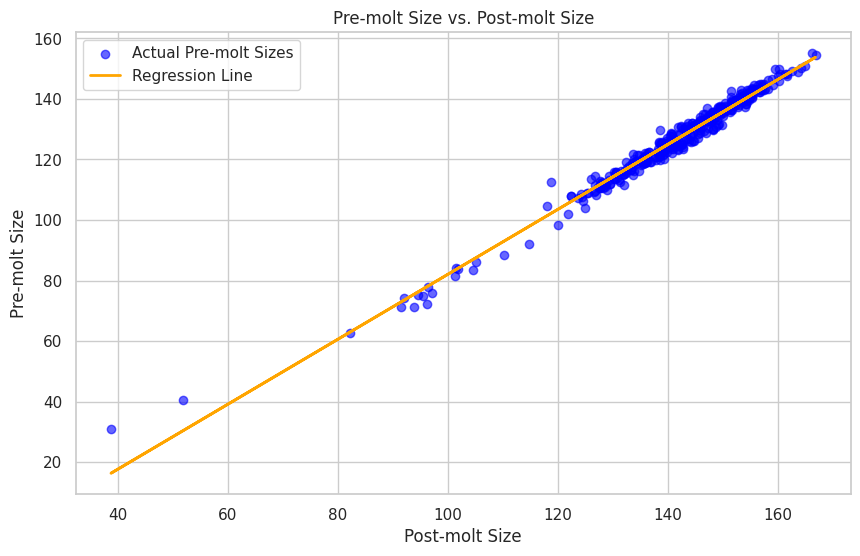

In [ ]:
# Linear Model for Lab Crabs
lab_model = linear_model(lab_crabs, 'Lab Crabs')

UTILIZING K-FOLD CROSS-VALIDATION

In [ ]:
# Cross-Validation For Lab Crabs
lab_cv_model = cross_validation_analysis(lab_crabs, 'Lab Crabs')


--- Cross-Validation Analysis for Lab Crabs ---


Mean Absolute Error (MAE): -1.543
Mean Squared Error (MSE): 4.689
Root Mean Squared Error (RMSE): 2.100
R-squared (R2): 0.978
Model Coefficients: Intercept = 25.832, Slope = 0.913
